In [1]:
%ls

data_exploration.ipynb  jpy-dev/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


# Data Load

In [85]:
wind_crk = pd.read_excel("../data/RWE_creek.xlsx", sheet_name="Sheet1")
desc = pd.read_excel("../data/RWE_creek.xlsx", sheet_name="Sheet2")
wind_crk["TTimeStamp"]= pd.to_datetime(wind_crk["TTimeStamp"],format='%Y-%m-%d %H:%M:%S.%f', errors="raise")

In [7]:
wind_crk.info()  

<class 'pandas.DataFrame'>
RangeIndex: 157464 entries, 0 to 157463
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   TURBINE_ID                           157464 non-null  str           
 1   TTimeStamp                           157464 non-null  datetime64[us]
 2   Gen_RPM_Avg                          157464 non-null  float64       
 3   Gen_Bear_Temp_Avg                    157464 non-null  float64       
 4   Gen_Phase1_Temp_Avg                  157464 non-null  float64       
 5   Gen_Phase2_Temp_Avg                  157464 non-null  float64       
 6   Gen_Phase3_Temp_Avg                  157464 non-null  float64       
 7   Amb_WindSpeed_Max                    157464 non-null  float64       
 8   Amb_WindSpeed_Min                    157464 non-null  float64       
 9   Amb_WindSpeed_Avg                    157464 non-null  float64       
 10  Amb_Win

In [86]:
wind_crk

,TURBINE_ID,TTimeStamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,...,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
0,T001,2018-09-15 00:10:00,131.1,35,35,35,35,2.4,1.6,2.1,...,600,600,600,0,0,0,0,600,0,0
1,T001,2018-09-15 00:20:00,144.7,34,35,35,35,2.6,1.7,2.3,...,600,600,600,0,0,0,0,600,0,0
2,T001,2018-09-15 00:30:00,155.7,34,35,35,35,2.6,2.0,2.4,...,600,600,600,0,0,33,0,600,0,0
3,T001,2018-09-15 00:40:00,144.0,34,35,35,35,2.6,2.0,2.3,...,600,600,600,0,0,38,0,600,0,0
4,T001,2018-09-15 00:50:00,124.2,34,35,35,35,2.2,1.7,2.0,...,600,600,600,0,0,24,0,600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,T013,2018-12-07 13:10:00,1060.1,48,70,71,71,8.1,5.3,6.8,...,600,600,600,600,0,0,0,600,600,0
157460,T013,2018-12-07 13:20:00,1060.0,48,70,71,71,8.9,5.7,6.8,...,600,600,600,600,0,25,0,600,600,0
157461,T013,2018-12-07 13:30:00,1044.3,48,70,72,71,8.4,5.3,6.7,...,600,600,600,600,0,0,0,600,600,0
157462,T013,2018-12-07 13:40:00,1031.1,48,70,71,71,8.2,4.7,6.4,...,600,600,600,600,0,0,0,600,600,0


In [26]:
wind_crk.iloc[:,20:].head(10)

,Grd_Prod_PsblePwr_Avg,Grd_Sets_ActPwr_ReferenceValue10Min,Grd_Prod_Pwr_InternalDerateStat,Grd_Prod_Pwr_InternalDerateTime,HCnt_Avg_Tot,HCnt_Avg_GrdOn,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
0,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
1,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
2,0.000000,0.0,0,0,600,600,600,600,600,0,0,33,0,600,0,0
3,0.000000,0.0,0,0,600,600,600,600,600,0,0,38,0,600,0,0
4,0.000000,0.0,0,0,600,600,600,600,600,0,0,24,0,600,0,0
5,0.000000,0.0,0,0,600,600,600,600,600,0,0,35,0,600,0,0
6,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
7,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
8,1.542700,0.0,0,0,600,600,600,600,600,0,0,27,0,600,0,0
9,17.300275,0.0,0,0,600,600,600,600,600,0,0,29,0,600,0,0


## Data type enforcing

In [87]:
dtype_mapping = {"Gen_Bear_Temp_Avg": float,
                 "Gen_Phase1_Temp_Avg": float,
                 "Gen_Phase2_Temp_Avg": float,
                 "Gen_Phase3_Temp_Avg": float,
                 "Amb_Temp_Avg":float,
                 "Cont_VCP_ChokcoilTemp_Avg":float}
wind_crk= wind_crk.astype(dtype_mapping)

## Basic timeseries check and cleaning

In [88]:
# Dedup timestamps basic based on turbine
# Remove duplicates within each turbine group
def remove_duplicate_timestamps(df, timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                               keep='first'):
    """
    Remove duplicate timestamps within each turbine group.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Your dataset
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    keep : str
        Which duplicate to keep: 'first', 'last', or False (remove all duplicates)
    
    Returns:
    --------
    df_cleaned : DataFrame with duplicates removed
    duplicate_info : DataFrame with information about removed duplicates
    """
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    print(f"Total rows before cleaning: {len(df)}")
    
    # Find duplicates within each turbine group
    duplicate_info = []
    df_cleaned_list = []
    
    for turbine_id in sorted(df[turbine_col].unique()):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        
        # Find duplicates for this turbine
        duplicates_mask = turbine_data.duplicated(subset=[timestamp_col], keep=False)
        n_duplicates = duplicates_mask.sum()
        
        if n_duplicates > 0:
            print(f"Turbine {turbine_id}: {n_duplicates} duplicate timestamp rows")
            duplicate_info.append({
                'turbine_id': turbine_id,
                'duplicate_rows': n_duplicates,
                'unique_duplicate_timestamps': turbine_data[duplicates_mask][timestamp_col].nunique()
            })
        
        # Remove duplicates for this turbine
        turbine_cleaned = turbine_data.drop_duplicates(subset=[timestamp_col], keep=keep)
        df_cleaned_list.append(turbine_cleaned)
    
    # Combine all cleaned turbine data
    df_cleaned = pd.concat(df_cleaned_list, ignore_index=True)
    df_cleaned = df_cleaned.sort_values([turbine_col, timestamp_col])
    
    print(f"\nTotal rows after cleaning: {len(df_cleaned)}")
    print(f"Rows removed: {len(df) - len(df_cleaned)}")
    
    duplicate_summary = pd.DataFrame(duplicate_info) if duplicate_info else None
    
    return df_cleaned, duplicate_summary

In [99]:
wind_crk_clean, dup_summary = remove_duplicate_timestamps(wind_crk)  # dedup and reports
dup_summary

Total rows before cleaning: 157464
Turbine T006: 1998 duplicate timestamp rows
Turbine T009: 1998 duplicate timestamp rows

Total rows after cleaning: 155466
Rows removed: 1998


,turbine_id,duplicate_rows,unique_duplicate_timestamps
0,T006,1998,999
1,T009,1998,999


In [93]:
# show all turbines min/max timestamp *** Help to make a decision for consistent transformation time frame
for turb in sorted(wind_crk.TURBINE_ID.unique().tolist()):
    startt = wind_crk.loc[wind_crk.TURBINE_ID==turb]['TTimeStamp'].min()
    endt = wind_crk.loc[wind_crk.TURBINE_ID==turb]['TTimeStamp'].max()
    print(turb, startt, endt)

T001 2018-09-15 00:10:00 2018-12-07 13:40:00
T002 2018-09-15 00:10:00 2018-12-07 13:40:00
T003 2018-09-15 00:10:00 2018-12-07 13:50:00
T004 2018-09-15 00:10:00 2018-12-07 13:50:00
T005 2018-09-15 00:10:00 2018-12-07 13:50:00
T006 2018-09-15 00:10:00 2018-12-07 13:50:00
T007 2018-09-15 00:10:00 2018-12-07 13:50:00
T008 2018-09-15 00:10:00 2018-12-07 13:50:00
T009 2018-09-15 00:10:00 2018-12-07 13:50:00
T010 2018-09-15 00:10:00 2018-12-07 13:50:00
T011 2018-09-15 00:10:00 2018-12-07 13:50:00
T012 2018-09-15 00:10:00 2018-12-07 13:50:00
T013 2018-09-15 00:10:00 2018-12-07 13:50:00


In [105]:
## Make sure all end timestamp aligns
wind_crk_clean = wind_crk_clean.loc[wind_crk_clean['TTimeStamp']<= datetime.strptime('2018-12-07 13:40:00', '%Y-%m-%d %H:%M:%S')]

In [106]:
# total count of timestamp sample

print("Time span between:", wind_crk_clean['TTimeStamp'].min(), wind_crk_clean['TTimeStamp'].max())
ttt = (wind_crk_clean['TTimeStamp'].max() - wind_crk_clean['TTimeStamp'].min())
count_tt = ttt.days*24*6+(ttt.seconds//600)
print("timestamp count per turbine:", count_tt)
count_tb_tt = wind_crk_clean.groupby('TURBINE_ID').size()
print(count_tb_tt)


Time span between: 2018-09-15 00:10:00 2018-12-07 13:40:00
timestamp count per turbine: 12033
TURBINE_ID
T001    11964
T002    11964
T003    11963
T004    11964
T005    11963
T006    11949
T007    11960
T008    11959
T009    11915
T010    11964
T011    11963
T012    11964
T013    11963
dtype: int64


In [32]:
print("Timestamp datetime start/end:", wind_crk["TTimeStamp"].min(), wind_crk["TTimeStamp"].max())

Timestamp datetime start/end: 2018-09-15 00:10:00 2018-12-07 13:50:00


In [21]:
def plot_timeseries(df, column_to_plot, timestamp_col='TTimeStamp', 
                    turbine_col='TURBINE_ID', figsize=(12, 6)):
    """
    Simple overlay plot of time series data grouped by turbine ID.
    """
    # Prepare data
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    df_sorted = df.sort_values(timestamp_col)
    
    # Get sorted unique turbine IDs
    turbine_ids = sorted(df_sorted[turbine_col].unique())
    
    
    # Create plot
    plt.figure(figsize=figsize)

    # Create color map - consistent colors for each turbine
    colors = plt.cm.tab10(range(len(turbine_ids)))
    color_map = dict(zip(turbine_ids, colors))
    
    for turbine_id in turbine_ids:
        turbine_data = df_sorted[df_sorted[turbine_col] == turbine_id]
        plt.plot(turbine_data[timestamp_col], 
                 turbine_data[column_to_plot],
                 label=f'Turbine {turbine_id}',
                 color=color_map[turbine_id])
    
    plt.xlabel('Timestamp')
    plt.ylabel(column_to_plot)
    plt.title(f'{column_to_plot} over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [40]:
# check counters value
counters_cols = [x for x in wind_crk.columns.values.tolist() if "HCnt" in x]
for ctrs_col in counters_cols:
    if len(wind_crk[ctrs_col].unique().tolist()) > 1:
        all_counts = sorted(wind_crk[ctrs_col].unique().tolist())
        threshold = 420
        blw_thre = [x for x in all_counts if x<= threshold]
        print("Missing count:", ctrs_col, "total increments:", len(blw_thre))

Missing count: HCnt_Avg_Tot total increments: 0
Missing count: HCnt_Avg_GrdOn total increments: 4
Missing count: HCnt_Avg_GrdOk total increments: 67
Missing count: HCnt_Avg_TrbOk total increments: 125
Missing count: HCnt_Avg_Run total increments: 232
Missing count: HCnt_Avg_Gen1 total increments: 421
Missing count: HCnt_Avg_Gen2 total increments: 421
Missing count: HCnt_Avg_Yaw total increments: 376
Missing count: HCnt_Avg_SrvOn total increments: 58
Missing count: HCnt_Avg_AmbOk total increments: 138
Missing count: HCnt_Avg_WindOk total increments: 421


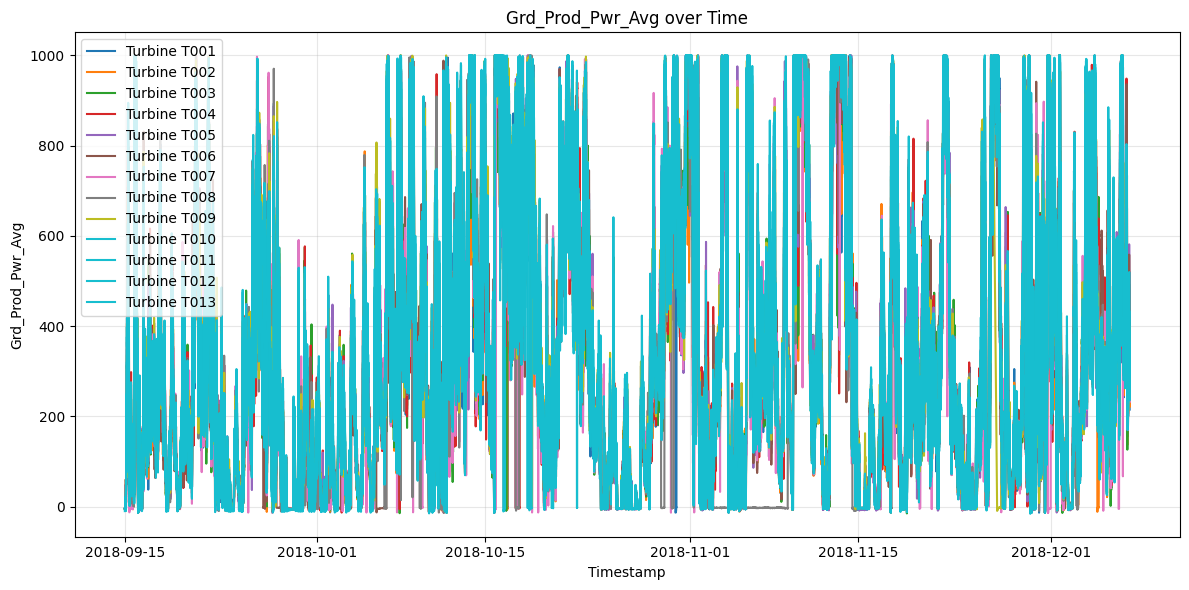

In [22]:
# plot some generation values by turbine and take a look 
plot_timeseries(wind_crk, "Grd_Prod_Pwr_Avg")

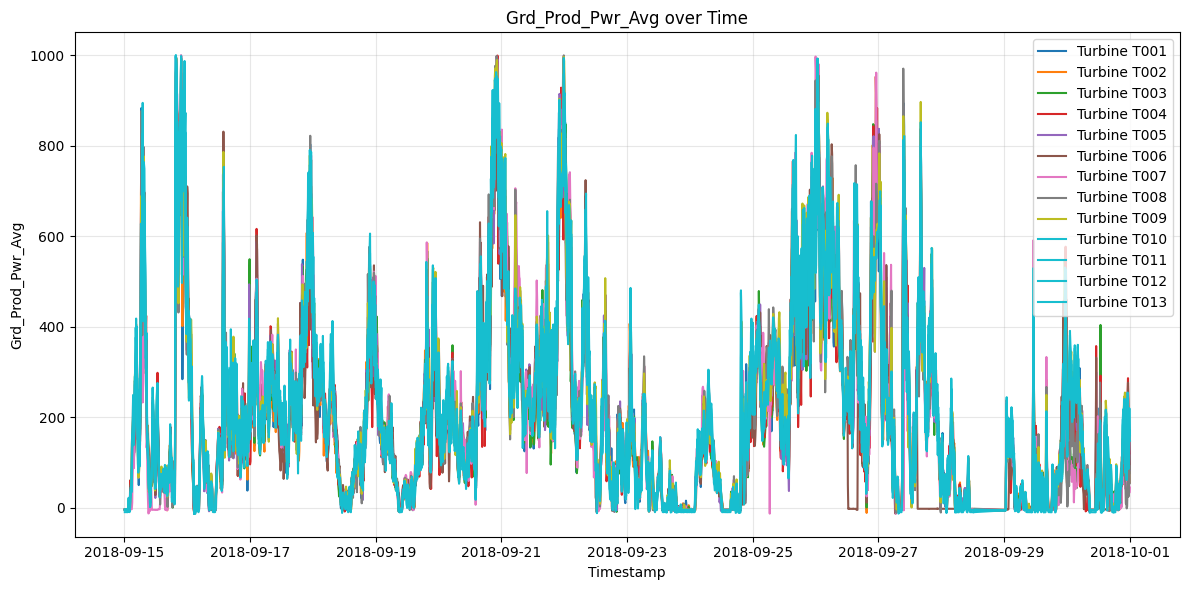

In [24]:
# look at a shorter time frame
start_date = '2018-09-15'
end_date = '2018-10-01'
df_filtered = wind_crk[(wind_crk['TTimeStamp'] >= start_date) & (wind_crk['TTimeStamp'] <= end_date)]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

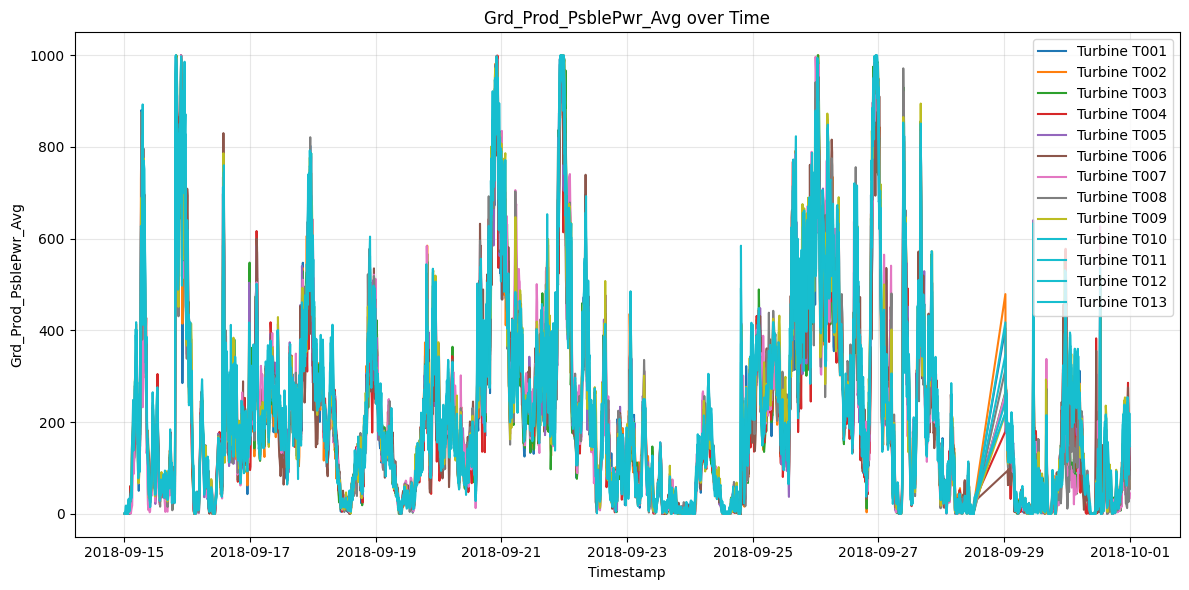

In [25]:
plot_timeseries(df_filtered, "Grd_Prod_PsblePwr_Avg")

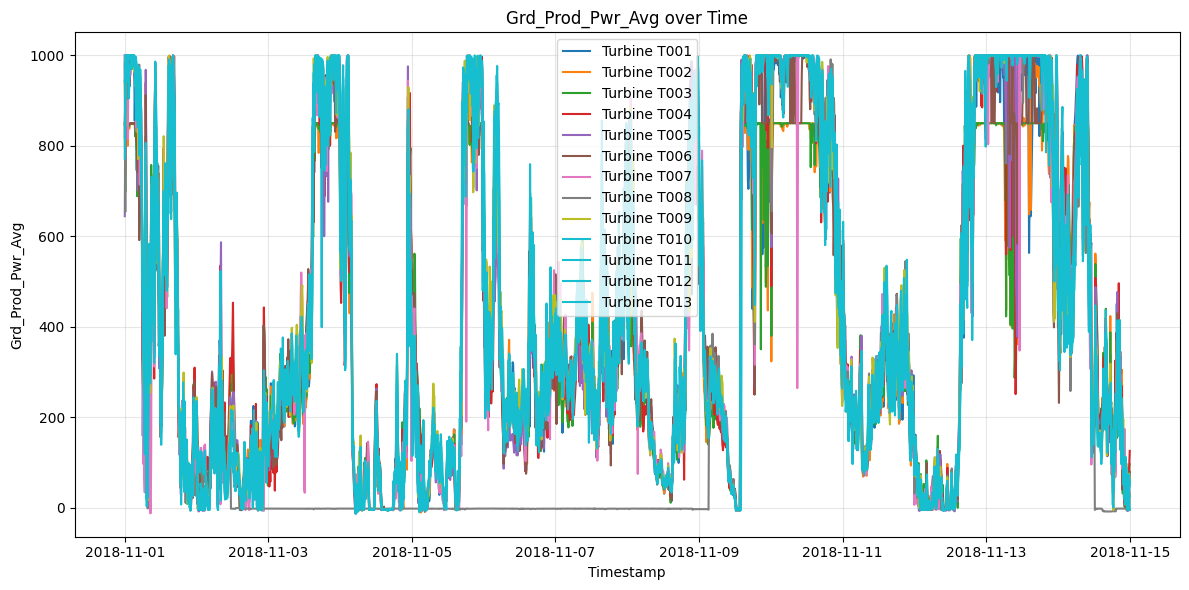

In [42]:
# look at a shorter time frame
start_date = '2018-11-01'
end_date = '2018-11-15'
df_filtered = wind_crk[(wind_crk['TTimeStamp'] >= start_date) & (wind_crk['TTimeStamp'] <= end_date)]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

In [52]:
# strap comparison of each turbine, their difference on pwr gen
def add_difference_column(df, column1, column2, new_column_name='diff_pwr',
                         difference_type='absolute', turbine_col='TURBINE_ID'):
    """
    Add a difference column to the dataframe, preserving grouping by turbine.
    
    Parameters:
    -----------
    difference_type : str
        - 'absolute': column1 - column2
        - 'relative': (column1 - column2) / column2 * 100
        - 'ratio': column1 / column2
    """
    df = df.copy()
    
    if difference_type == 'absolute':
        df[new_column_name] = df[column1] - df[column2]
    elif difference_type == 'relative':
        df[new_column_name] = (df[column1] - df[column2]) / df[column2] * 100
    elif difference_type == 'ratio':
        df[new_column_name] = df[column1] / df[column2]
    else:
        raise ValueError("difference_type must be 'absolute', 'relative', or 'ratio'")
    
    return df
# create a plotting schem to examine the diff timeseries

def plot_difference_column(df, turbine_ids, diff_column, 
                          timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                          start_date=None, end_date=None,
                          figsize=(14, 10), ylabel=None, title=None):
    """
    Plot a pre-calculated difference column for selected turbines.
    Each turbine gets its own subplot showing the difference over time.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Your dataset (should already have the difference column calculated)
    turbine_ids : list
        List of turbine IDs to plot (e.g., [1, 2, 3])
    diff_column : str
        Name of the difference column to plot
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    start_date : str, optional
        Start date for filtering
    end_date : str, optional
        End date for filtering
    figsize : tuple
        Figure size
    ylabel : str, optional
        Custom y-axis label (default: uses diff_column name)
    title : str, optional
        Custom overall title (default: auto-generated)
    """
    # Prepare data
    df = df.sort_values([turbine_col, timestamp_col])
    
    # Check if difference column exists
    if diff_column not in df.columns:
        raise ValueError(f"Column '{diff_column}' not found in dataframe. "
                        f"Please use add_difference_column() first.")
    
    # Filter by date range if provided
    if start_date:
        df = df[df[timestamp_col] >= start_date]
    if end_date:
        df = df[df[timestamp_col] <= end_date]
    
    # Filter for selected turbines only
    df = df[df[turbine_col].isin(turbine_ids)]
    
    # Calculate number of rows and columns for subplots
    n_turbines = len(turbine_ids)
    n_cols = 2 if n_turbines > 1 else 1
    n_rows = (n_turbines + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=True)
    
    # Handle case of single subplot
    if n_turbines == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Get consistent colors for turbines
    colors = plt.cm.tab10(range(len(turbine_ids)))
    color_map = dict(zip(sorted(turbine_ids), colors))
    
    # Default labels
    y_label = ylabel if ylabel else diff_column
    plot_title = title if title else f'{diff_column} by Turbine'
    
    # Plot each turbine
    for idx, turbine_id in enumerate(sorted(turbine_ids)):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        
        if len(turbine_data) == 0:
            axes[idx].text(0.5, 0.5, f'No data for Turbine {turbine_id}',
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(f'Turbine {turbine_id}')
            continue
        
        # Plot difference column
        axes[idx].plot(turbine_data[timestamp_col], turbine_data[diff_column],
                      color=color_map[turbine_id], linewidth=1.5, alpha=0.8)
        axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
        axes[idx].set_title(f'Turbine {turbine_id}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(y_label, fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        
        # Print statistics for this turbine
        print(f"\nTurbine {turbine_id} Statistics ({diff_column}):")
        print(f"  Mean: {turbine_data[diff_column].mean():.4f}")
        print(f"  Std: {turbine_data[diff_column].std():.4f}")
        print(f"  Min: {turbine_data[diff_column].min():.4f}")
        print(f"  Max: {turbine_data[diff_column].max():.4f}")
    
    # Hide unused subplots
    for idx in range(n_turbines, len(axes)):
        axes[idx].set_visible(False)
    
    # Set common xlabel on bottom plots
    for idx in range(n_turbines):
        if idx >= (n_rows - 1) * n_cols:  # Bottom row
            axes[idx].set_xlabel('Timestamp', fontsize=10)
    
    # Overall title
    fig.suptitle(plot_title, fontsize=14, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    plt.show()
    
    return df

In [49]:
wind_crk = add_difference_column(wind_crk, "Grd_Prod_Pwr_Avg","Grd_Prod_PsblePwr_Avg")


Turbine T001 Statistics (diff_pwr):
  Mean: -10.9859
  Std: 57.9967
  Min: -882.4793
  Max: 8.1543

Turbine T003 Statistics (diff_pwr):
  Mean: -20.9381
  Std: 58.9811
  Min: -870.3030
  Max: 7.2176

Turbine T013 Statistics (diff_pwr):
  Mean: -6.4302
  Std: 54.0713
  Min: -976.4738
  Max: 6.9421


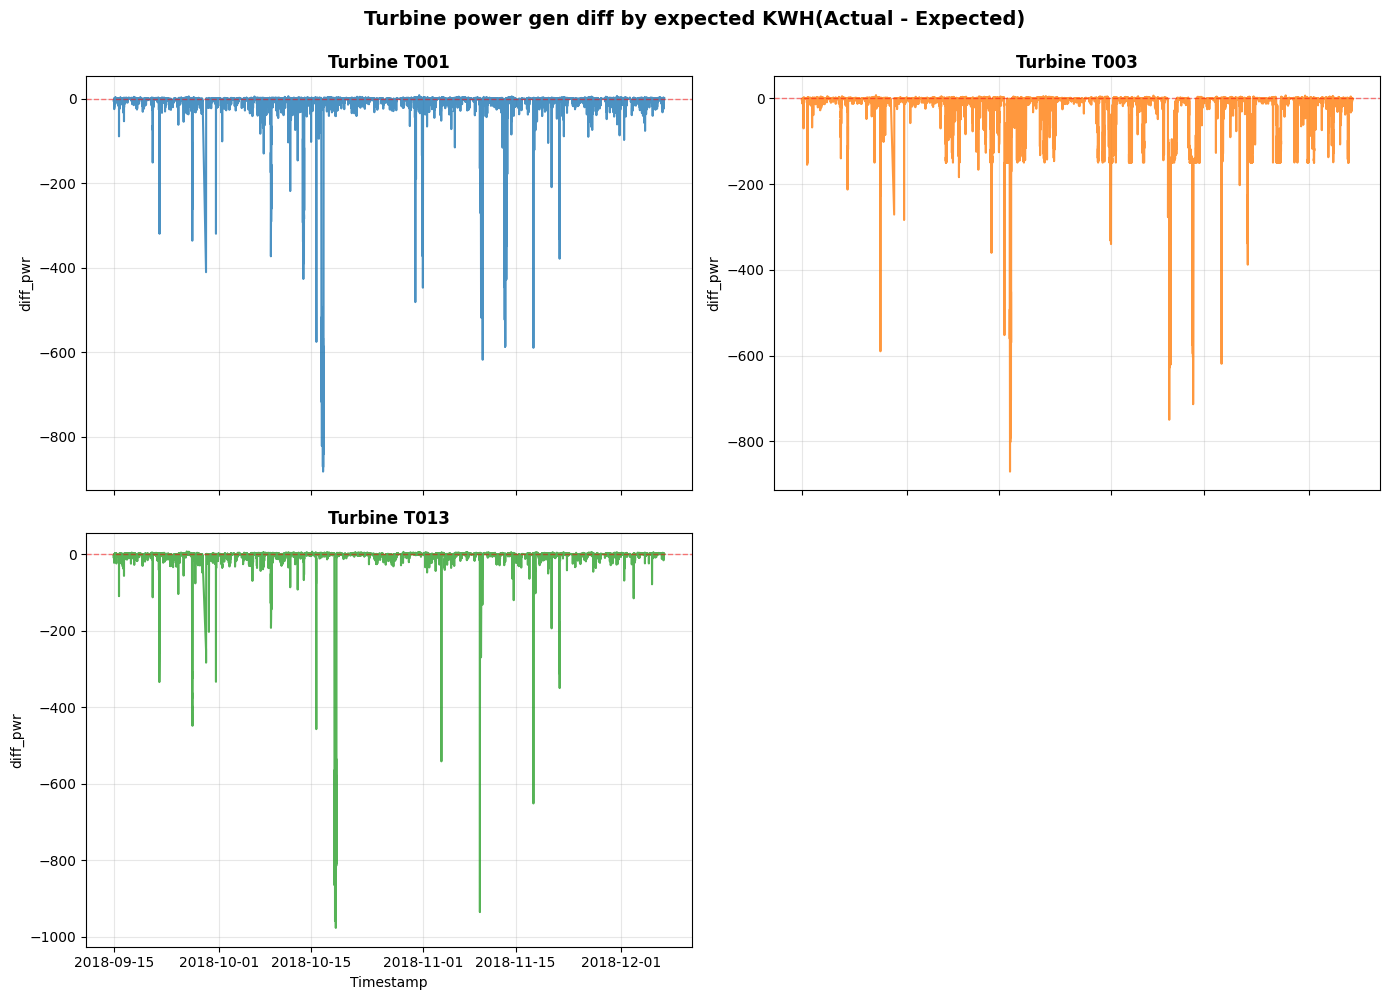

,TURBINE_ID,TTimeStamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,...,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo,diff_pwr
0,T001,2018-09-15 00:10:00,131.1,35.0,35.0,35.0,35.0,2.4,1.6,2.1,...,600,600,0,0,0,0,600,0,0,-5.068871
1,T001,2018-09-15 00:20:00,144.7,34.0,35.0,35.0,35.0,2.6,1.7,2.3,...,600,600,0,0,0,0,600,0,0,-5.068871
2,T001,2018-09-15 00:30:00,155.7,34.0,35.0,35.0,35.0,2.6,2.0,2.4,...,600,600,0,0,33,0,600,0,0,-3.966942
3,T001,2018-09-15 00:40:00,144.0,34.0,35.0,35.0,35.0,2.6,2.0,2.3,...,600,600,0,0,38,0,600,0,0,-3.911846
4,T001,2018-09-15 00:50:00,124.2,34.0,35.0,35.0,35.0,2.2,1.7,2.0,...,600,600,0,0,24,0,600,0,0,-3.856749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,T013,2018-12-07 13:10:00,1060.1,48.0,70.0,71.0,71.0,8.1,5.3,6.8,...,600,600,600,0,0,0,600,600,0,0.055096
157460,T013,2018-12-07 13:20:00,1060.0,48.0,70.0,71.0,71.0,8.9,5.7,6.8,...,600,600,600,0,25,0,600,600,0,0.716253
157461,T013,2018-12-07 13:30:00,1044.3,48.0,70.0,72.0,71.0,8.4,5.3,6.7,...,600,600,600,0,0,0,600,600,0,0.165289
157462,T013,2018-12-07 13:40:00,1031.1,48.0,70.0,71.0,71.0,8.2,4.7,6.4,...,600,600,600,0,0,0,600,600,0,-0.110193


In [57]:
turbine_ids = ["T001", "T003", "T013"]
diff_column = "diff_pwr"
plot_difference_column(wind_crk, turbine_ids, diff_column, 
                          timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                          start_date=None, end_date=None,
                          figsize=(14, 10), ylabel=None, title="Turbine power gen diff by expected KWH(Actual - Expected)")

In [53]:
wind_crk.info()

<class 'pandas.DataFrame'>
RangeIndex: 157464 entries, 0 to 157463
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   TURBINE_ID                           157464 non-null  str           
 1   TTimeStamp                           157464 non-null  datetime64[us]
 2   Gen_RPM_Avg                          157464 non-null  float64       
 3   Gen_Bear_Temp_Avg                    157464 non-null  float64       
 4   Gen_Phase1_Temp_Avg                  157464 non-null  float64       
 5   Gen_Phase2_Temp_Avg                  157464 non-null  float64       
 6   Gen_Phase3_Temp_Avg                  157464 non-null  float64       
 7   Amb_WindSpeed_Max                    157464 non-null  float64       
 8   Amb_WindSpeed_Min                    157464 non-null  float64       
 9   Amb_WindSpeed_Avg                    157464 non-null  float64       
 10  Amb_Win

In [28]:
df_filtered[["TTimeStamp","Grd_Prod_Pwr_Avg"]].head(50)

,TTimeStamp,Grd_Prod_Pwr_Avg
0,2018-09-15 00:10:00,-5.068871
1,2018-09-15 00:20:00,-5.068871
2,2018-09-15 00:30:00,-3.966942
3,2018-09-15 00:40:00,-3.911846
4,2018-09-15 00:50:00,-3.856749
5,2018-09-15 01:00:00,-3.856749
6,2018-09-15 01:10:00,-3.746556
7,2018-09-15 01:20:00,-3.746556
8,2018-09-15 01:30:00,-3.856749
9,2018-09-15 01:40:00,-3.856749


In [35]:
desc

,TURBINE_ID,Turbine ID
0,TTimeStamp,Timestamp
1,Gen_RPM_Avg,Generator Speed (rpm)
2,Gen_Bear_Temp_Avg,Generator bearing temperature
3,Gen_Phase1_Temp_Avg,Generator Phase 1 temperature
4,Gen_Phase2_Temp_Avg,Generator Phase 2 temperature
5,Gen_Phase3_Temp_Avg,Generator Phase 3 temperature
6,Amb_WindSpeed_Max,Ambient Windspeed Max
7,Amb_WindSpeed_Min,Ambient Windspeed Min
8,Amb_WindSpeed_Avg,Ambient Windspeed Avg
9,Amb_WindDir_Abs_Avg,Ambient WindDirection Avg
